# **Credit Risk Analysis**
### Wirdin Rivera
#### Source: https://www.openintro.org/data/index.php?data=loans_full_schema
#### This particular dataset is a representation of thousands of loans made through the Lending Club Platform, platform that allows individuals to lend money to others. Utilizing this dataset, we are going to conduct an exhaustive examination aimed at uncovering valuable insights into borrower behaviors, encompassing aspects like credit scores, risk indicators, and the potential for default. Through this endeavor, we intend to forge a pathway towards enhancing the efficiency of our business and financial decision-making processes, thereby fostering a more informed and strategic approach.

## Packages / Data Set

In [1]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Present all the columns
pd.set_option("display.max_columns", None)

# Data Set
original_df = pd.read_csv("./loans_full_schema.csv")

## Data Cleaning

In [2]:
original_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

#### Initially, I considered incorporating the joint columns (co-applicant's information) to explore potential correlations with loan approval. However, upon observing the substantial number of null values within these columns, it becomes evident that they will not contribute to this analysis.

#### Another set of columns that may not align well with our analysis are "months_since_last_delinq" and "months_since_90d_late." Although these attributes hold relevance in this context, their high proportion of NaN values poses a challenge. Attempting to rectify this by filling NaN values with zeros or approximating values based on similar cases could misrepresent the data. Consequently, I have decided to exclude these columns from our analysis as well.

In [4]:
# Copy of our data set before making significant changes
copy_df = original_df.copy()

# Remove columns we're not using
copy_df.drop(columns=copy_df.columns[38:], axis=1, inplace=True)

# Delete columns with high number of null values (5000+)
copy_df.drop(columns=["annual_income_joint", "verification_income_joint", "debt_to_income_joint", "months_since_last_delinq", "months_since_90d_late"], inplace=True)

# Delete rows with null values
copy_df.dropna(inplace=True)

# Check
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7758 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         7758 non-null   object 
 1   emp_length                        7758 non-null   float64
 2   state                             7758 non-null   object 
 3   homeownership                     7758 non-null   object 
 4   annual_income                     7758 non-null   float64
 5   verified_income                   7758 non-null   object 
 6   debt_to_income                    7758 non-null   float64
 7   delinq_2y                         7758 non-null   int64  
 8   earliest_credit_line              7758 non-null   int64  
 9   inquiries_last_12m                7758 non-null   int64  
 10  total_credit_lines                7758 non-null   int64  
 11  open_credit_lines                 7758 non-null   int64  
 12  total_

In [5]:
copy_df.describe().round(3)

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt
count,7758.000,7758.000,7758.000,7758.000,7758.000,7758.000,7758.000,7758.000,7758.000,7758.000,7758.000,7758.000,7758.0,7758.000,7758.000,7758.000,7758.000,7758.000,7758.0,7758.0,7758.000,7758.000,7758.000,7758.000,7758.000,7758.000,7758.000,7758.000,7758.000
mean,5.903,83428.194,19.181,0.211,2001.742,2.269,23.562,11.813,196371.382,54429.294,0.013,0.173,0.0,196.835,2.868,4.774,7.409,11.798,0.0,0.0,3.570,27742.086,13.247,8.274,5.257,1.447,94.649,0.046,0.127
std,3.695,68758.764,14.789,0.667,7.406,2.449,12.090,5.937,194156.446,56133.854,0.119,0.746,0.0,2456.339,2.995,3.158,5.983,5.934,0.0,0.0,2.382,26757.974,7.917,4.980,3.335,1.739,9.127,0.658,0.340
min,0.000,3000.000,0.000,0.000,1963.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,2.000,0.000,0.000,0.000,14.300,0.000,0.000
25%,2.000,50000.000,11.142,0.000,1998.000,1.000,15.000,8.000,56704.250,21354.750,0.000,0.000,0.0,0.000,1.000,3.000,2.000,8.000,0.0,0.0,2.000,10000.000,7.000,5.000,3.000,0.000,92.700,0.000,0.000
50%,6.000,70000.000,17.520,0.000,2003.000,2.000,22.000,11.000,130754.500,39699.000,0.000,0.000,0.0,0.000,2.000,4.000,6.000,11.000,0.0,0.0,3.000,19800.000,12.000,7.000,5.000,1.000,100.000,0.000,0.000
75%,10.000,100000.000,24.830,0.000,2006.000,3.000,30.000,15.000,285573.000,68894.000,0.000,0.000,0.0,0.000,3.000,6.000,11.000,15.000,0.0,0.0,5.000,36600.000,17.000,11.000,7.000,2.000,100.000,0.000,0.000
max,10.000,2300000.000,469.090,13.000,2015.000,26.000,87.000,51.000,3386034.000,942456.000,2.000,52.000,0.0,199308.000,35.000,29.000,24.000,51.000,0.0,0.0,32.000,279700.000,66.000,46.000,43.000,14.000,100.000,52.000,3.000


#### It has come to my attention that there might be questionable values present in the "debt_to_income" column, which could potentially skew our dataset and have a substantial impact on our analysis. Additionally, I have noticed uncertain values in the "annual_income" column, with a minimum reported value of 3,000 and a maximum one of 2,300,000. While these instances may be isolated, it is crucial to validate their accuracy before proceeding with any corrective measures.

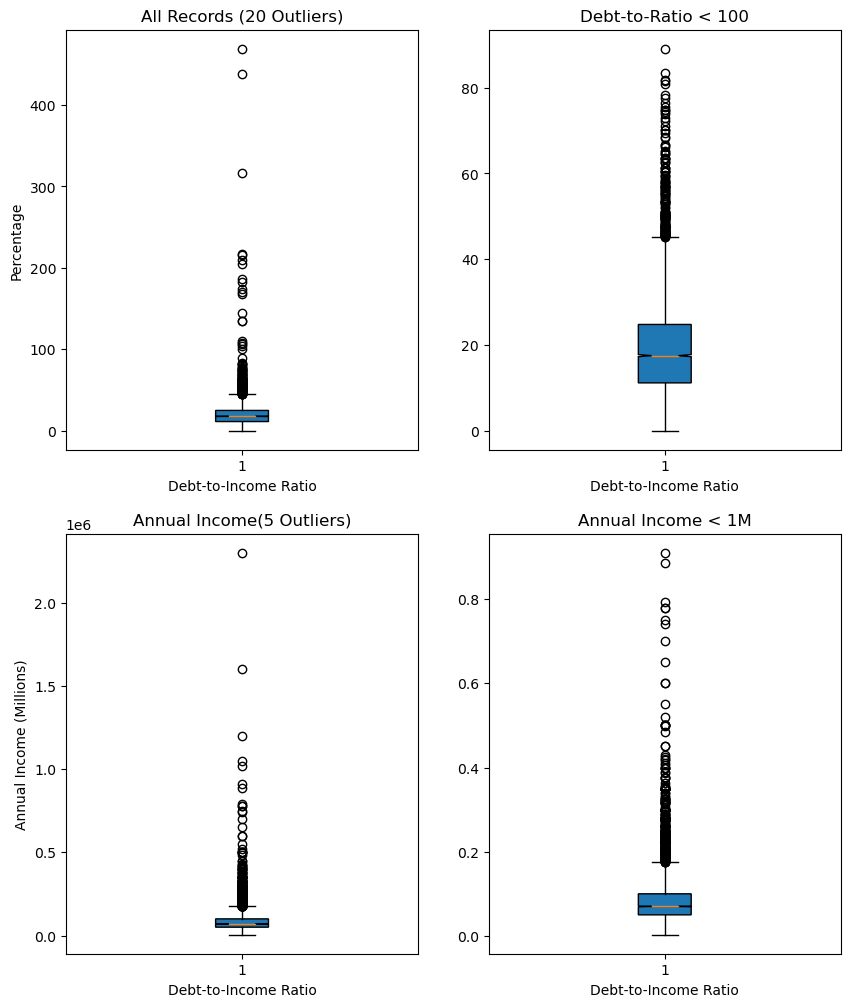

In [6]:
# Create subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 12))

# Default for all figures
for ax in axs.flatten():
    ax.set_xlabel("Debt-to-Income Ratio")

# All Records of debt to ratio
ax = axs[0, 0]
outliers = copy_df.loc[copy_df["debt_to_income"] > 100, "debt_to_income"].count()
ax.boxplot(copy_df["debt_to_income"], notch=True, patch_artist=True)
ax.set_ylabel("Percentage")
ax.set_title("All Records " + f"({outliers} Outliers)")

# Debt to income ratio < 100
ax = axs[0, 1]
filtered_data = copy_df[copy_df["debt_to_income"] <= 100]
ax.boxplot(filtered_data["debt_to_income"], notch=True, patch_artist=True)
ax.set_yticks(range(0, 100, 20))
ax.set_title("Debt-to-Ratio < 100")

# Annual Income
ax = axs[1, 0]
outliers = copy_df.loc[copy_df["annual_income"] >= 1_000_000, "annual_income"].count()
ax.boxplot(filtered_data["annual_income"], notch=True, patch_artist=True)
ax.set_title(f"Annual Income" + f"({outliers} Outliers)")
ax.set_ylabel("Annual Income (Millions)")

# Annual Income < 1_000_000
ax = axs[1, 1]
filtered_data = copy_df[copy_df["annual_income"] <= 1_000_000]
ax.boxplot(filtered_data["annual_income"], notch=True, patch_artist=True)
ax.set_yticks(range(0, 1_000_000, 200_000))
ax.set_yticklabels([f"{x/1_000_000:.1f}" for x in range(0, 1_000_000, 200_000)])
ax.set_title("Annual Income < 1M")

plt.show()

#### Upon careful examination of the data and identification of outliers, I contemplated addressing the issue of unrealistic values in the "debt to income" ratio column by capping them at 100. Yet, this approach could yield inaccurate information and skew the analysis in unintended ways. Although these instances are few, their presence could significantly influence the outcome of our analysis. As a result, I have made the decision to eliminate all records that have a debt-to-income ratio surpassing 100. These specific entries seem improbable and have the potential to compromise the reliability of our overarching analysis. 

#### We'll leave the annual incomes as is.

In [7]:
# Filter out the records that have a debt to income ratio higher than 100
copy_df = copy_df[~(copy_df["debt_to_income"] > 100)].reset_index()

#### Unintentionally, the removal of outliers from the debt-to-income ratio has led to a reduction in the count of very low and less plausible annual income values.

In [8]:
# Count of annual incomes less than 10K
copy_df.loc[copy_df["annual_income"] < 10000, "annual_income"].count()

4

## Create a credit scoring model to assign a score to individual borrowers, leveraging their financial attributes.

In [9]:
# Create copy of data set
data_scored = copy_df.copy()
data_scored = data_scored[["emp_title", "emp_length", "state", "homeownership", "annual_income", "verified_income", "debt_to_income", "earliest_credit_line", "total_credit_limit", "total_credit_utilized"]]

from helper_functions import *

# Create score column and add their respective score value
data_scored["score"] = data_scored.apply(calculate_credit_score, axis=1)

In [10]:
# Confirm there are not wrong values on Score column
data_scored["score"].describe()

count    7738.000000
mean      706.768545
std       141.956078
min       175.000000
25%       625.000000
50%       725.000000
75%       825.000000
max      1000.000000
Name: score, dtype: float64

## We're embarking on the creation of a new column, "credit_to_utilized," which bears resemblance to the concept of the debt-to-income ratio. Within this column, a new metric will come to life, formed by the division of an individual's total credit utilized by their total credit limit. This calculation will unveil the extent to which an individual has either exceeded their credit limit (expressed as a percentage) or the remaining credit available to them. This addition to our analysis equips us with an enhanced tool, one designed to gauge financial management practices and risk. Through the "credit_to_utilized" ratio, we'll acquire valuable insights into the proximity of borrowers to their credit limits, aiding us in evaluating whether their credit utilization is prudent or if they're edging towards potential financial strain. This innovative metric aligns seamlessly with our mission to comprehensively assess default likelihood based on diverse financial attributes.

In [11]:
# Create limit to utilized ratio column and add their respective percentage
data_scored["limit_to_utilized"] = data_scored.apply(calculate_credit_to_utilized, axis=1).round(2)

In [12]:
# Confirm there are not wrong values on Limit to Utilized column
data_scored["limit_to_utilized"].describe()

count    7738.000000
mean       39.898016
std        26.741881
min         0.000000
25%        16.812500
50%        35.140000
75%        60.187500
max       183.530000
Name: limit_to_utilized, dtype: float64

### Evidently, there are a few outliers exhibiting higher percentages than expected. Let's take a look at it before proceeding further.

In [13]:
data_scored[data_scored["limit_to_utilized"] > 80].sort_values("limit_to_utilized", ascending=False)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,earliest_credit_line,total_credit_limit,total_credit_utilized,score,limit_to_utilized
4259,office manager,7.0,FL,RENT,70000.0,Not Verified,28.58,1993,147723,271113,525,183.53
1855,physician,0.0,ID,MORTGAGE,225000.0,Source Verified,8.28,1988,471818,783821,550,166.13
7411,owner,10.0,FL,MORTGAGE,45000.0,Source Verified,4.99,1987,94526,151149,675,159.90
3101,professor,5.0,CT,MORTGAGE,107000.0,Not Verified,29.36,1998,225546,333531,600,147.88
2830,teacher,10.0,AR,OWN,45000.0,Source Verified,24.21,2001,89826,128214,700,142.74
...,...,...,...,...,...,...,...,...,...,...,...,...
1377,family assistance analyst ii,4.0,NM,RENT,38043.0,Verified,38.33,1983,129793,104031,550,80.15
6918,independent contractor,4.0,CA,RENT,89748.0,Verified,17.18,2001,64445,51645,575,80.14
6801,legal instruments examiner,1.0,WV,RENT,50912.0,Not Verified,42.03,2004,154913,124011,325,80.05
1235,loader/unloader,1.0,GA,RENT,26304.0,Source Verified,17.70,2015,25802,20654,225,80.05


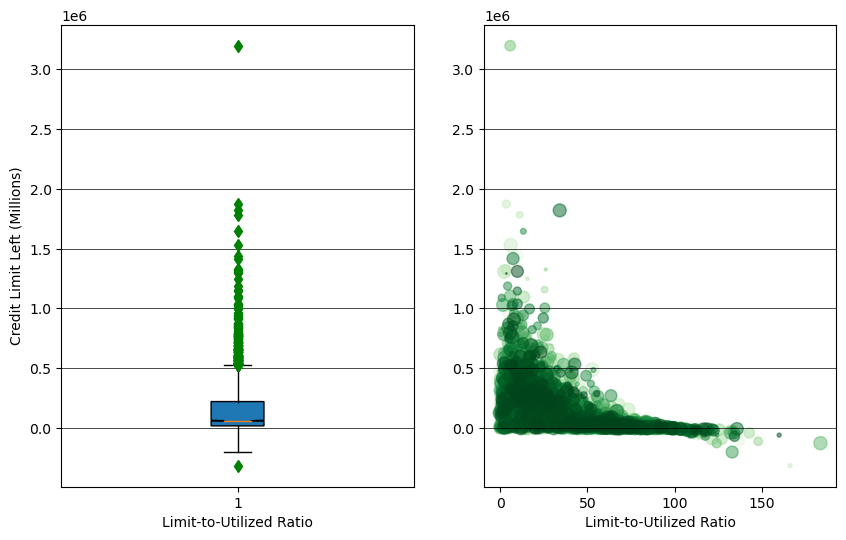

In [14]:
# Create new column with exceeding values
data_scored["credit_limit_left"] = data_scored["total_credit_limit"] - data_scored["total_credit_utilized"]

# Outliers filtered out > 1M
# filtered_data = data_scored[data_scored["credit_limit_left"] < 1_000_000]

# Create subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Colors and size of bubbles
colors = np.arange(len(data_scored))
size = np.random.rand(7738)

# Default to all figures
for ax in axs:
    ax.set_xlabel("Limit-to-Utilized Ratio")   

ax = axs[0]
ax.boxplot(data_scored["credit_limit_left"], notch=True, patch_artist=True, sym="gd")
ax.yaxis.grid(True, linewidth=0.5, color="black")
ax.set_ylabel("Credit Limit Left (Millions)")

ax = axs[1]
ax.scatter(data_scored["limit_to_utilized"], data_scored["credit_limit_left"], s=size*100, c=colors, cmap="Greens", alpha=0.5)
ax.yaxis.grid(True, linewidth=0.5, color="black")

plt.show()

#### From the visual representations, it becomes evident that there are numerous outliers within the Limit to Utilized ratio column. Despite these values surpassing the 100% threshold, they serve as a clear indicator of poor financial management. Retaining this information is essential for future insights, and as such, I have chosen to retain these data points.

## Inquiry: Are there specific attributes that remain consistent among individuals with high credit scores?

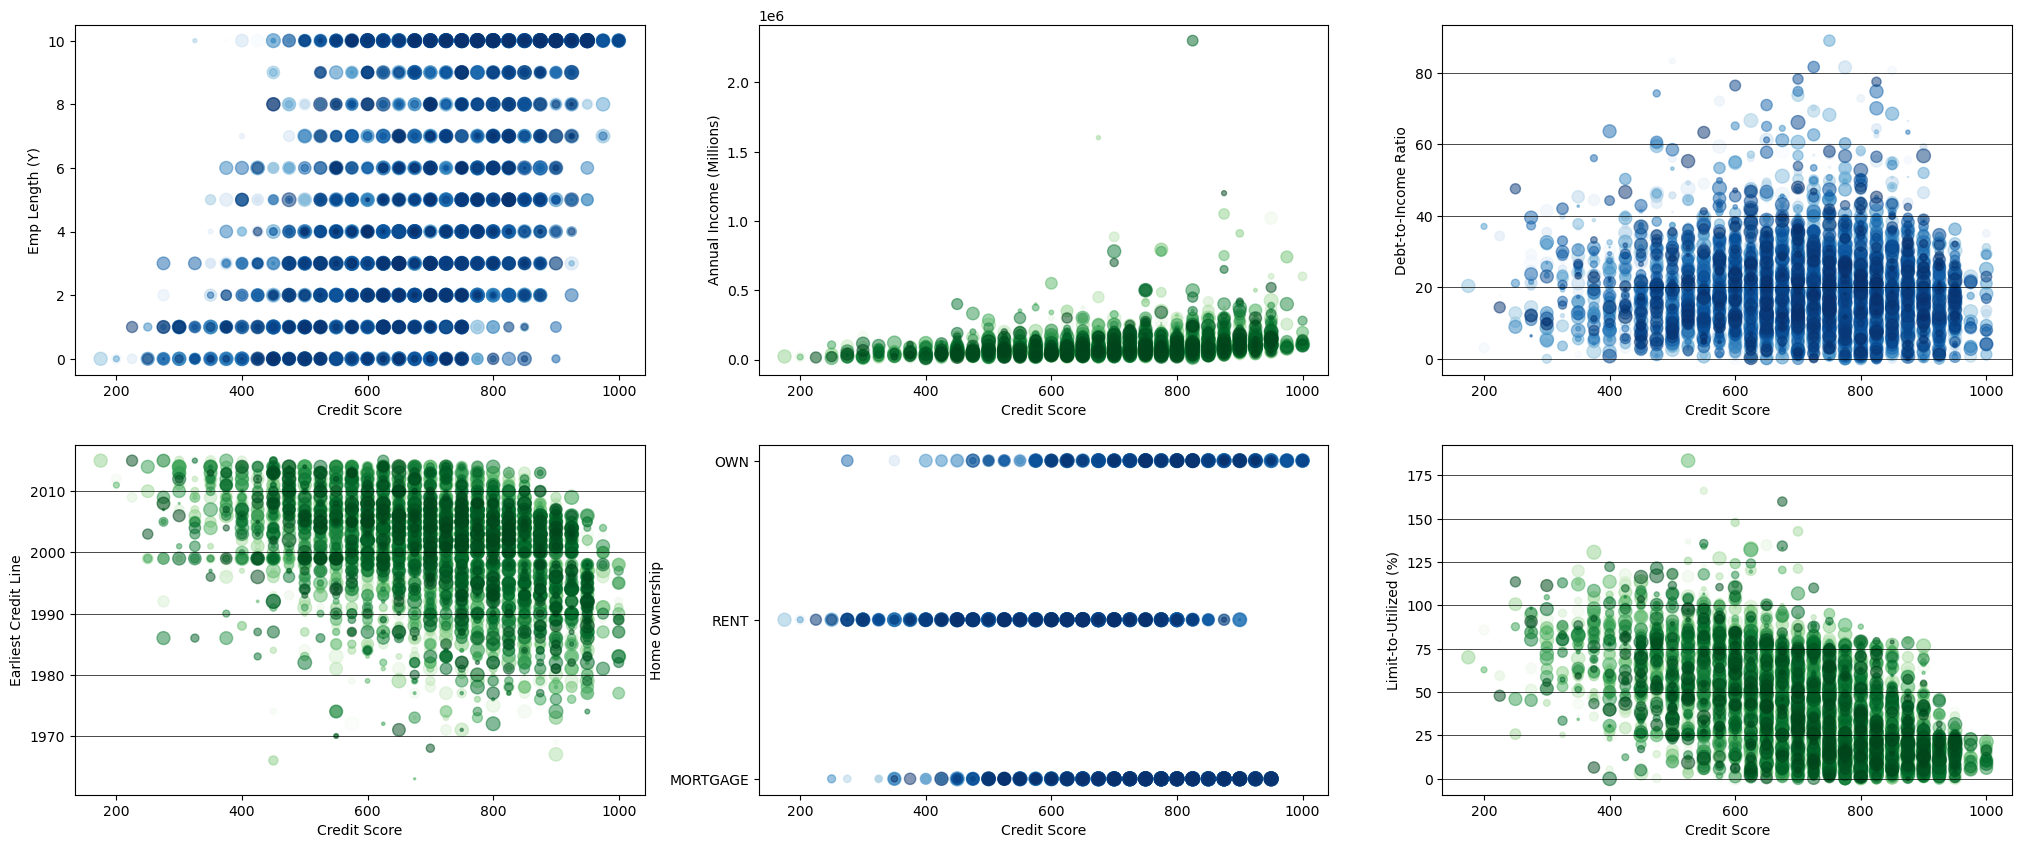

In [15]:
# Filter out income outliers
# data_scored = data_scored[data_scored["annual_income"] < 1_000_000]

# Create subplot
fig, axs = plt.subplots(2, 3, figsize=(25, 10))

# Default for all figures
for row in range(2):
    for col in range(3):
        ax = axs[row, col]
        ax.set_xlabel("Credit Score")

# Colors and size of bubbles
colors = np.arange(len(data_scored))
size = np.random.rand(7738)

# Employment Length and Credit Score Correlation
ax = axs[0, 0]
ax.scatter(data_scored["score"], data_scored["emp_length"], s=size*100, c=colors, cmap="Blues", alpha=0.5)
ax.set_ylabel("Emp Length (Y)")

# Annual Income and Credit Score Correlation
ax = axs[0, 1]
ax.scatter(data_scored["score"], data_scored["annual_income"], s=size*100, c=colors, cmap="Greens", alpha=0.5)
ax.set_ylabel("Annual Income (Millions)")

# Earliest Credit Line and Credit Score Correlation
ax = axs[1, 0]
ax.scatter(data_scored["score"], data_scored["earliest_credit_line"], s=size*100, c=colors, cmap="Greens", alpha=0.5)
ax.set_ylabel("Earliest Credit Line")
ax.yaxis.grid(True, linewidth=0.5, color="black")

# Home Ownership and Credit Score Correlation
ax = axs[1, 1]
ax.scatter(data_scored["score"], data_scored["homeownership"], s=size*100, c=colors, cmap="Blues", alpha=0.5)
ax.set_ylabel("Home Ownership")

# Debt to Income and Credit Score Correlation
ax = axs[0, 2]
ax.scatter(data_scored["score"], data_scored["debt_to_income"], s=size*100, c=colors, cmap="Blues", alpha=0.5)
ax.set_ylabel("Debt-to-Income Ratio")
ax.yaxis.grid(True, linewidth=0.5, color="black")

# Utilized Credit to Limit Ratio and Credit Score Correlation
ax = axs[1, 2]
ax.scatter(data_scored["score"], data_scored["limit_to_utilized"], s=size*100, c=colors, cmap="Greens", alpha=0.5)
ax.set_ylabel("Limit-to-Utilized (%)")
ax.yaxis.grid(True, linewidth=0.5, color="black")

plt.show()

#### In this collection of correlation charts, several patterns emerge:
#### 1- A clear positive correlation exists between employment length and credit score, as longer employment durations are associated with higher credit scores.

#### 2- Higher annual incomes are linked to elevated credit scores, indicating a direct relationship between income and creditworthiness.

#### 3- An intriguing finding is that individuals with high debt-to-income ratios can still achieve high credit scores. However, a closer examination reveals that the lowest the ratio, the higher the score tends to be. Most individuals in this dataset exhibit debt-to-income ratios below 40%, indicating a favorable distribution of financial stability.

#### 4- The earlier an individual established their credit line, the higher their credit score tends to be. Notably, those whose credit history dates back to 2000 or earlier are more likely to achieve the maximum credit score of 1000.

#### 5- Ownership status affects credit scores to some extent. Homeowners, particularly those who own their homes outright, tend to have higher credit scores than renters. The hierarchy of credit scores suggests that renters have the lowest, followed by mortgage holders, and then homeowners with full ownership.

#### 6- The data reveals a negative correlation between the limit-to-utilized ratio and credit scores. As this ratio increases, indicating higher credit utilization, credit scores generally decrease. However, it's worth noting that even when the ratio surpasses 50%, a significant portion of individuals maintain credit scores above 600. Furthermore, a few outliers have a limit-to-utilized ratio exceeding 100%, yet their credit scores remain relatively high at 600 or above.

## Inquiry: Which states rank among the top 10 for the highest credit scores, and could population size be a contributing factor?

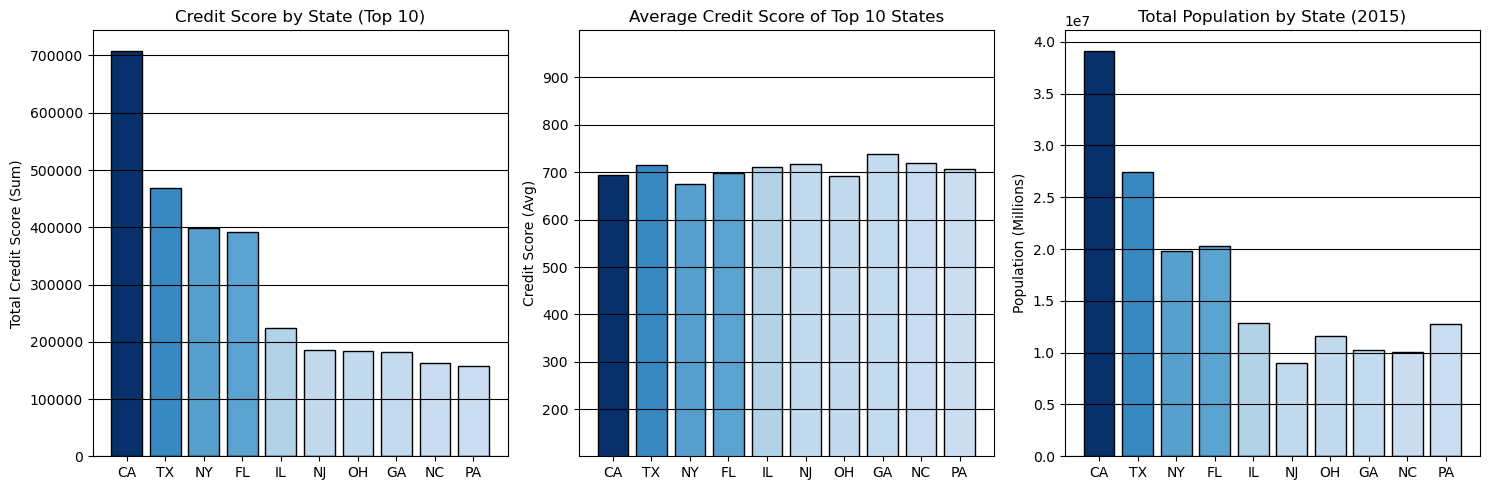

In [22]:
# Copy of data frame
data = data_scored[["state", "score"]].copy()
data = data.groupby("state")["score"].sum().reset_index()
data = data.sort_values("score", ascending=False)

# Create subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Create colors
n = np.array(data["score"] / max(data["score"]))
colormap = plt.colormaps["Blues"]

# Figure 1 - Top 10 highest
ax = axs[0]
ax.bar(data["state"].head(10), data["score"].head(10), color=colormap(n), edgecolor="black")
ax.set_title("Credit Score by State (Top 10)")
ax.set_ylabel("Total Credit Score (Sum)")
ax.yaxis.grid(True, color="black")

# Figure 2 - Average of Top 10
top_states = ["CA", "TX", "NY", "FL", "IL", "NJ", "OH", "GA", "NC", "PA"]
average = data_scored[data_scored["state"].isin(top_states)]
average = average.groupby("state")["score"].mean().reset_index()

# Custom order
average["state"] = pd.Categorical(average["state"], categories=top_states, ordered=True)
average_sorted = average.sort_values("state")

# Figure
ax = axs[1]
ax.bar(average_sorted["state"], average_sorted["score"], color=colormap(n), edgecolor="black")
ax.set_ylim(101, 999)
ax.set_title("Average Credit Score of Top 10 States")
ax.set_ylabel("Credit Score (Avg)")
ax.yaxis.grid(True, color="black")

# Figure 3 - Population and Total Credit Score
population_data = {
    "state": ["CA", "TX", "NY", "FL", "IL", "NJ", "OH", "GA", "NC", "PA"],
    "population": [39_144_818, 27_469_114, 19_795_791, 20_271_272, 12_859_995, 8_958_013, 11_613_423,10_214_860, 10_042_802, 12_802_503]
}
population = pd.DataFrame(population_data)

# Figure
ax = axs[2]
ax.bar(population["state"], population["population"], color=colormap(n), edgecolor="black")
ax.set_title("Total Population by State (2015)")
ax.set_ylabel("Population (Millions)")
ax.yaxis.grid(True, color="black")

plt.tight_layout()
plt.show()

#### Observing the data, it becomes evident that the leading states in terms of credit scores are the top 10, with California (CA) at the forefront boasting a total score surpassing 700,000. Texas (TX) follows closely with over 460,000, and New York (NY) and Florida (FL) trail in the third and fourth positions, amassing nearly 400,000. The subsequent chart provides insights into the average credit scores of these states, which consistently hover around 700. Among these, New York records the lowest average around 670, while Georgia (GA) takes the lead with an average exceeding 710. Furthermore, the third chart showcases the total state population by 2015, revealing a noteworthy correlation with the prior analyses. It is evident that higher population states tend to exhibit higher total and average credit scores, aligning with our expectations.

## Inquiry: Is it possible to forecast the likelihood of a borrower defaulting on their loan by analyzing their financial attributes?

#### We're going to develop a model akin to the previous credit scoring approach. However, in this iteration, we'll adopt a percentage-based methodology. We'll follow a similar framework of awarding points based on specific criteria derived from a range of columns. This approach will aid us in assessing the probability of an individual's likelihood to default.

In [17]:
# Import helper function
from helper_functions import calculate_risk_score

# Filter out the columns we already used in the credit score model
risk_columns = copy_df.copy()
risk_columns = risk_columns[risk_columns.columns[~risk_columns.columns.isin(data_scored.columns)]]
risk_columns["score"] = data_scored["score"]
risk_columns["risk"] = risk_columns.apply(calculate_risk_score, axis=1)

### Let's see the distribution.

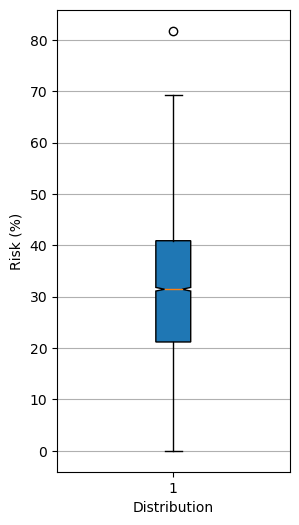

In [18]:
# Create subplot
fig, axs = plt.subplots(figsize=(3, 6))

# Figure
ax = axs
ax.boxplot(risk_columns["risk"], patch_artist=True, notch=True)
ax.set_ylabel("Risk (%)")
ax.set_xlabel("Distribution")
ax.yaxis.grid(True)

plt.show()

#### Based on our chart, it becomes evident that 75% of the dataset presents risk percentages below 40%. This distribution highlights a prevalent occurrence of risk percentages ranging from 20 to 40, signifying a categorization into the low to medium risk range. Additionally, a noticeable skew towards the higher end is observable, with the maximum threshold nearing 70% and an exceptional outlier surpassing 80%. Further exploration is needed to gain deeper insights into these noteworthy values.

## Inquiry: Do high-risk borrowers share any consistent attributes?

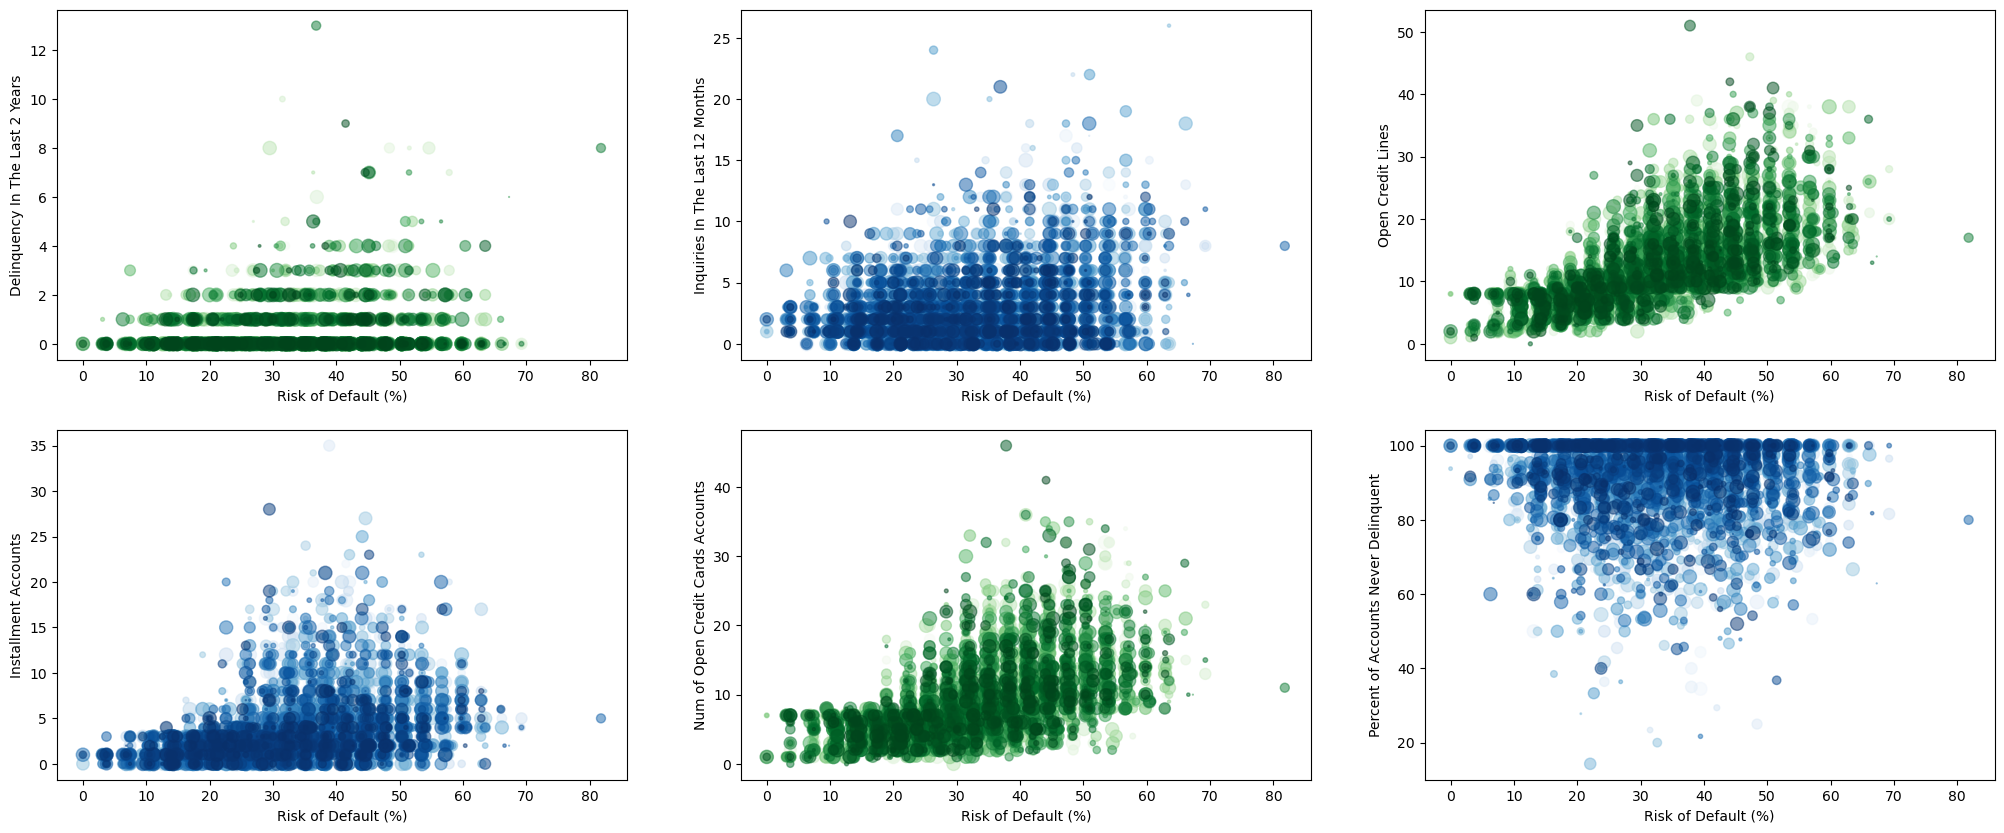

In [19]:
# Create subplot
fig, axs = plt.subplots(2, 3, figsize=(25, 10))

# Common between figures
for ax in axs.flatten():
    ax.set_xlabel("Risk of Default (%)")

# Colors and bubbles size
colors = np.arange(len(risk_columns))
size = np.random.rand(risk_columns["risk"].count())

# Figure 1 - Delinquency in two years and Risk percentage
ax = axs[0, 0]
ax.scatter(risk_columns["risk"], risk_columns["delinq_2y"], s=size*100, c=colors, cmap="Greens", alpha=0.5)
ax.set_ylabel("Delinquency In The Last 2 Years")

# Figure 2 - Inquiries in the last 12 months and Risk percentage
ax = axs[0, 1]
ax.scatter(risk_columns["risk"], risk_columns["inquiries_last_12m"], s=size*100, c=colors, cmap="Blues", alpha=0.5)
ax.set_ylabel("Inquiries In The Last 12 Months")

# Figure 3 - Open credit lines and Risk Percentage
ax = axs[0, 2]
ax.scatter(risk_columns["risk"], risk_columns["open_credit_lines"], s=size*100, c=colors, cmap="Greens", alpha=0.5)
ax.set_ylabel("Open Credit Lines")

# Figure 4 - Accounts with 120 days past due and Risk Percentage
ax = axs[1, 0]
ax.scatter(risk_columns["risk"], risk_columns["current_installment_accounts"], s=size*100, c=colors, cmap="Blues", alpha=0.5)
ax.set_ylabel("Installment Accounts")

# Figure 5 - Open Credit Cards Accounts and Risk Percentage
ax = axs[1, 1]
ax.scatter(risk_columns["risk"], risk_columns["num_open_cc_accounts"], s=size*100, c=colors, cmap="Greens", alpha=0.5)
ax.set_ylabel("Num of Open Credit Cards Accounts")

# Figure 6 - Accounts never delinquent percent and Risk Percentage
ax = axs[1, 2]
ax.scatter(risk_columns["risk"], risk_columns["account_never_delinq_percent"], s=size*100, c=colors, cmap="Blues", alpha=0.5)
ax.set_ylabel("Percent of Accounts Never Delinquent")

plt.show()

#### The data unmistakably reveals a conspicuous pattern emerging from the correlation charts. The trends underscored within these visual representations suggest a clear tendency: individuals possessing a larger number of open credit lines, elevated counts of open credit card accounts, and a notable presence of installment accounts tend to display a distinct and gradually intensifying degree of risk.

#### A compelling observation arising from the data is that even individuals with a high percentage of accounts consistently maintaining a delinquency-free status tend to align with a moderate risk of default.

#### On the other hand, attributes such as the count of delinquencies within the last two years or the number of inquiries in the preceding two months do not exhibit a significant correlation with higher default risk. Funny enough, those with lower count of inquiries or deliquencies are the ones with medium risk of default.

## Inquiry: Does a correlation exist between potential default and the assigned credit scores?

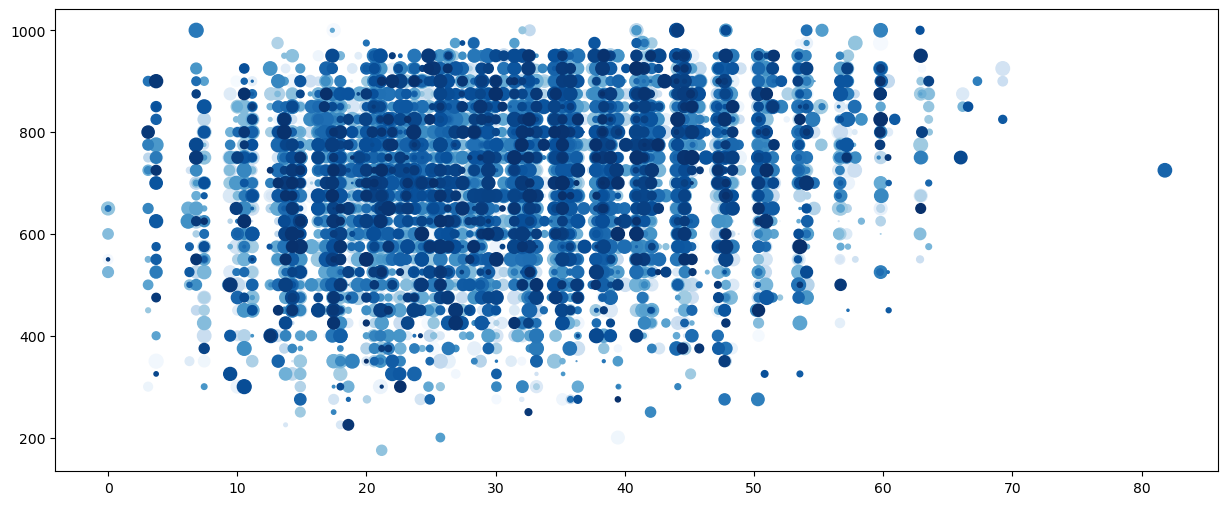

In [20]:
# Create plot
fig, axs = plt.subplots(figsize=(15, 6))

# Colors and bubbles size
colors = np.arange(len(risk_columns))
size = np.random.rand(risk_columns["risk"].count())

# Credit Score and Risk Percentage
ax = axs
ax.scatter(risk_columns["risk"], risk_columns["score"], s=size*100, c=colors, cmap="Blues")

plt.show()

#### The majority of the data points exhibit credit scores surpassing 600 and fall within the range of 20% to 30%. The distribution pattern indicates a noteworthy trend: as the credit score escalates, the associated risk diminishes. However, it's noteworthy to highlight that even at elevated scores such as 800 or even 1000, there remain individuals with moderate to high levels of risk.

#### Examining the chart's left segment, which encompasses the region below the 10% risk threshold, it becomes apparent that within this limited subset, higher credit scores (600 and above) predominate. Conversely, the right-hand corner of the chart reveals an interesting contrast: above the 50% risk mark (indicative of high risk), there exists a slightly larger population compared to the opposing side, despite both segments maintaining a prevalence of high credit scores.

## Summary
### Within this extensive risk analysis, we have explored a diverse array of attributes, correlation patterns, default tendencies, and individual trends. By employing tailored models such as the "Credit Score" and "Risk of Default", we have devised an improved approach to categorizing subjects, facilitating a more precise examination of their attributes. These tools have yielded invaluable insights, enabling us to identify emerging trends that can aid institutions in pinpointing high-risk factors, including the number of credit lines or open credit cards. Indications of financial strain, such as a high volume of inquiries within a specified timeframe or credit utilization exceeding limits. Along with noteworthy attributes like employment duration, inception of the first credit line, and annual income for potential borrowers. These findings collectively contribute to a more nuanced understanding of risk assessment and enhance an institution's ability to make informed decisions.